Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", 
as well as your name(s) and group number in the cell below:

In [1]:
NAMES = "Ludwig Lewis,Erik Dahllöf"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "45"                # fill in your group number between the quotes

---

# Problem 1 (5 pts)

This problem is about complex numbers. Euler's formula says that

$$e^{i\phi} = \cos \phi + i \sin \phi$$

where $e$ is the base of the natural logarithm and $i$ is the square root of −1 (i.e. the imagninary unit).

Using the `cmath` module and a value of $\phi = 30^\circ$, calculate $e^{i\phi}$ and $\cos \phi + i \sin \phi$ and
check that they both give the same numerical value. Save the two results in variables `lhs` and `rhs` (short for *left hand side* and *right hand side*), respectively, because these are checked in an `assert` statement below.

*Note that, the `cmath` module does not provide functions `radians` and `complex`, which are part of the `math`
module, and you should provide a solution that doesn't need these.*

In [2]:
import cmath
# YOUR CODE HERE
phi= 30
phirad= phi*cmath.pi/180
lhs=cmath.exp(phirad*1j)
rhs=cmath.cos(phirad) + 1j*cmath.sin(phirad)


In [3]:
assert lhs == rhs

# Problem 2

List and dictionary comprehension.

## Problem 2a: Lists (3 pts)

Write a `for` loop that produces the list of numbers of the form $\frac{1}{i^2}$ for $i = 1\ldots 10$ with alternate sign, i.e in Python the list would look like the following:

``` python
L1 = [1, -0.25, 0.1111111, -0.0625, ..., -0.01] 
```

Call your list `L1` as shown in the code example. 

In [4]:
# YOUR CODE HERE
import math
L1 = []
for i in range(1,11):
    L1.append(math.pow(-1,i-1) / (i**2))

In [5]:
assert L1[0] == 1.0
assert L1[1] == -0.25
assert L1[9] == -0.01

## Problem 2b (3 pts)

Now, produce the same list using list comprehension. This time, store your list in a variable called `L2`.

In [6]:
# YOUR CODE HERE
L2=[math.pow(-1,i-1)/ (i**2) for i in range(1,11)]

In [7]:
assert L1 == L2

## Problem 2c: Dictionaries (3 pts)

Write a `for` loop that produces a dictionary where the keys are strings of the form `<i> deg`, with
`i` ranging from 0 to 9, and the values are the sine function evaluated at `i` degrees:

```python
D1 = { '0 deg': 0.00000, '1 deg': 0.017452, '2 deg': 0.034899, ..., '9 deg': 0.156434 }
```

Call your dictionary D1 as shown in the code example.

In [8]:
# YOUR CODE HERE
import math
D1 = {}
for i in range(10):
     D1[str(i)+' deg']=math.sin(math.radians(i))

In [9]:
assert D1.get("0 deg") == 0.0
assert abs(D1.get("9 deg") - 0.156434) < 1.0e-6 

## Problem 2d (3 pts)

Now, produce the same dictionary using dictionary comprehension. This time, store your dictionary in a variable called `D2`.

In [10]:
# YOUR CODE HERE
D2 = {str(i)+' deg': math.sin(math.radians(i)) for i in range(10)}

In [11]:
assert D1 == D2

# Problem 3 (10 pts)

Use a `for` loop to caclulate $\pi$ from first 20 terms of the *Madhava series*:

$$\pi = \sqrt{12}\left(1-\frac{1}{3\cdot 3}+\frac{1}{5\cdot 3^2}-\frac{1}{7\cdot 3^3}+ \ldots \right)$$

Store your result in a variable called `madhava`. 

We will test below that the absolute difference between 
your result and the "true" value of $\pi$ (i.e. `math.pi`) is less than $10^{-9}$.

*If you want, you may also provide a solution based on just one line of code. 
The `numpy` package is not needed here, but feel free to use it, if you think you can use it to your advantage.*

In [12]:
# YOUR CODE HERE
madhava=0
for i in range(20):
    madhava+= math.pow(-1,i) / ((2*i+1)*math.pow(3,i))
madhava*=math.sqrt(12)

In [13]:
print(madhava, math.pi)

assert abs(madhava - math.pi) < 1.0e-9

3.1415926535714034 3.141592653589793


# Problem 4

The *hailstone sequence* starting at an integer $n > 0$ is generated by the repeated application of the three rules:
* if $n = 1$, the sequence ends;
* if $n$ is even, the next number in the  sequence is $n/2$;
* if $n$ is odd, the next number in the  sequence is $3n + 1$.

## Problem 4a (8 pts)

Write a **generator function** `hailstone` (i.e. the function will be using the Python keyword `yield`,
rather than `return`), which "yields" the next number in the sequence, The function starts at an integer `n`, 
which is passed as an argument to the function. 

**All numbers in the sequence should be integer!**

In [14]:
def hailstone(n):
    """Produce the hailstone sequence starting from n."""
    # YOUR CODE HERE
    while(n!=1):
        if(n%2==0):
            n/=2
        else:
            n=3*n+1
        yield(n)
        
    
    

You should now be able to get the sequence of numbers for a start value of **10**, by using the following code.

In [15]:
# just run this code cell and make sure it passes the assertions below

h10 = hailstone(10)

# h10 is now a generator object, which is iterable, so we can turn it into a list.
sequence = list(h10)
print(sequence)

# And the length of our sequence (which is called its *stopping time*) is simply:
print(len(sequence))

assert sequence == [5, 16, 8, 4, 2, 1]
assert len(sequence) == 6


[5.0, 16.0, 8.0, 4.0, 2.0, 1.0]
6


## Problem 4b (2 pts)

Print the *stopping times* for all sequences with start value $n$, where $n = 1\ldots 100$.
Your output should look like the following:
```
the stopping time for   1 is   0
the stopping time for   2 is   1
the stopping time for   3 is   7
the stopping time for   4 is   2
...
the stopping time for  97 is 118
the stopping time for  98 is  25
the stopping time for  99 is  25
the stopping time for 100 is  25
```

i.e. all integers should be printed with a width of 3, as they can be >= 100 and should be right aligned.

In [16]:
# YOUR CODE HERE
for i in range(1,101):
    print('the stopping time for {} is {}'.format(str(i).rjust(3),str(len(list(hailstone(i)))).rjust(3)))

the stopping time for   1 is   0
the stopping time for   2 is   1
the stopping time for   3 is   7
the stopping time for   4 is   2
the stopping time for   5 is   5
the stopping time for   6 is   8
the stopping time for   7 is  16
the stopping time for   8 is   3
the stopping time for   9 is  19
the stopping time for  10 is   6
the stopping time for  11 is  14
the stopping time for  12 is   9
the stopping time for  13 is   9
the stopping time for  14 is  17
the stopping time for  15 is  17
the stopping time for  16 is   4
the stopping time for  17 is  12
the stopping time for  18 is  20
the stopping time for  19 is  20
the stopping time for  20 is   7
the stopping time for  21 is   7
the stopping time for  22 is  15
the stopping time for  23 is  15
the stopping time for  24 is  10
the stopping time for  25 is  23
the stopping time for  26 is  10
the stopping time for  27 is 111
the stopping time for  28 is  18
the stopping time for  29 is  18
the stopping time for  30 is  18
the stoppi

Is there any sequence that does not stop? What would happen in that case?

The stopping time would be infinite and we would become world famous for solving the *3n+1* problem

# Problem 5


| parameter | Earth value, $x_{i,\oplus}$ | weight $w_i$ |
|:----------|:----------------------------|:-------------|
| radius    | 1.0                         | 0.57         |
| density   | 1.0                         | 1.07         |
| escape velocity   | 1.0                 | 0.7          |
| surface temperature  | 288.0            | 5.58         |

The *Earth Similarity Index* (ESI) attempts to quantify the physical similarity between an astronomical body 
(usually a planet or moon) and Earth. If we have astronomical bodies numbered $j = 0\ldots n$, then the ESI of 
the $j$th body is defined by

$${\rm ESI}_j = \prod_{i=1}^{n} \left( 1 - \Big| \frac{x_{i,j}-x_{i,\oplus}}{x_{i,j}+x_{i,\oplus}} \Big| \right) ^{w_i/n}$$

where the parameters $x_{i,j}$ are described, and their terrestrial values, $x_{i,\oplus}$ and 
weights, $w_i$ given in the table above. This means, in the formula the product runs from $1\ldots n=4$, as we have four parameters. The ESI lies between 0 and 1, with values closer to 1 indicating closer similarity to Earth 
(which has an ESI of exacvtly 1: Earth is identical to itself!)

## Problem 5a (10 pts)

The file [ex2-6-g-esi-data.txt](https://scipython.com/static/media/problems/P2.6/ex2-6-g-esi-data.txt) contains
the earlier mentioned parameters for a range of astronomical bodies. Use these data to
calculate the ESI for each of the bodies. 

> *Note that, the file contains additional parameters that you won't use.* 
> *You are only interested in the columns with the parameters listed in the table above.*
>
> *This means when reading the file, you will have to skip the first three rows (the table header)*
> *and then extract columns 'radius', 'density', 'v_esc' and 'Tsurf'.*
> 
> *The weights are not part of the file, you will have to create a list of weights manually with the 
> values given above.*

Your solution should produce a table like the following, where the body's name is in a 20 character wide column
and the ESI for each body is printed with 3 decimals:

``` python
Earth                   1.000
Mars                    0.697
Mercury                 0.595
Moon                    0.557
...
```

In [17]:
# YOUR CODE HERE
import pandas as pd
data = pd.read_fwf('https://scipython.com/static/media/problems/P2.6/ex2-6-g-esi-data.txt',skiprows=3, names=['name','mass','radius','density','g','v_esc','a','Tsurf','Teq'],index_col='name')
data = data.loc[:, ['radius', 'density', 'v_esc', 'Tsurf']]
weights = [0.57, 1.07 , 0.7 , 5.58]
esiValues = []
earthValues = [1,1,1,288]

for name,row in data.iterrows():
    esiTemp=1
    for i in range(len(row)):
        esiTemp*=(1 - abs( (row[i]-earthValues[i]) / (row[i]+earthValues[i]) )) **(weights[i]/(4))
    esiValues.append(esiTemp)
data['ESI'] = esiValues

for names, row in data.iterrows():
    esi = row.values[4]
    print(f"{names:<20} {esi:3.3f}")
    

Earth                1.000
Mars                 0.697
Mercury              0.595
Moon                 0.557
Venus                0.444
Io                   0.363
Jupiter              0.293
Titan                0.243
GJ 581 g             0.890
GJ 581 b             0.483
HD 96167 b           0.465
WASP-26 b            0.094


## Problem 5b (3 pts)

Which of these astronomical bodies has properties “closest” to those of the Earth?

GJ 581 b

# Problem 6

In this exercise you will use the functions from the previous *matplotlib* exercise set to determine how some of the other planets of the solar system move with respect to the Earth. 

First we include again the pieces of code and arrays from the previous exercise set that describe the solar system and translate the orbits to cartesian $x, y, $ and $z$ coordinates.

*Just run all the code cells up to 'Problem 6a'.*

First the basic packages:

In [2]:
# just run this code cell

# first, for later use, import all the necessary packages (redundant if already done earlier)
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Then the array with orbital elements:

In [4]:
# These are the orbital elements that are needed to plot the (eliptical) orbits of the planets
# It is a list of lists, with for each planet:
# a [semi-major axis in astronomical units au]
# e [the elipticity of the orbit, between [0, 1] with the higher the value to more elliptical the orbit]
# I [the inclination of the orbit, i.e. the angle between the plane of the orbit and the plane containing the Earth orbit in degrees]
# peri, node [these are the two angles that define the position of the ellipse in units of degree]
# period [the orbital period in units of years]
# Name [the name of the planet]
orb_elements = [
    [0.3871, 0.20564, 7.006, 77.46, 48.34, 0.241, 'Mercury'],   # Mercury
    [0.7233, 0.00676, 3.398, 131.77, 76.67, 0.615, 'Venus'],  # Venus
    [1.0, 0.01673, 0.0, 102.93, 0.0, 1.0, 'Earth'],         # Earth
    [1.5237, 0.09337, 1.852, 336.08, 49.71, 1.881, 'Mars'],  # Mars
    [5.2025, 0.04854, 1.299, 14.27, 100.29, 11.87, 'Jupiter'],  # Jupiter
    [9.5415, 0.05551, 2.492, 92.86, 113.64, 29.47, 'Saturn'],  # Saturn
    [19.188, 0.04689, 0.773, 172.43, 73.96, 84.05, 'Uranus'],  # Uranus
    [30.070, 0.00895, 1.770, 46.68, 131.79, 164.9, 'Neptune'],  # Neptune
    [39.4821, 0.24883, 17.14, 113.76, 110.30, 247.94, 'Pluto'],# Pluto 
    ]


And the function that will allow you to calculate the cartesian position (in $x, y,$ and $z$ coordinates) 
from the orbital elements ($a, e, I,$ peri and node) as well as the position along this orbit, 
which is called the eccentric anomaly $E$. This eccentric anomaly is an angle that can take 
any value between $[0, 2\pi]$.  

In [5]:
# just run this code cell

def orbitalElements2Cartesian(a, e, I, peri, node, E):
    """ Convert orbital elements to Cartesian coordinates in the Solar System.

    Args: 
        a (float): semi-major axis (AU)
        e (float): eccentricity
        I (float): inclination (degrees)
        peri (float): longitude of perihelion (degrees)
        node (float): longitude of ascending node (degrees)
        E (float): eccentric anomaly (radians) ; this can be an array or single value

    """

    # The source of equations used:
    # http://farside.ph.utexas.edu/teaching/celestial/Celestialhtml/node34.html
        
    # Convert degrees to radians (using the map function, but you could have simply used (np.pi * angle/180.).
    I, peri, node = map(np.radians, [I, peri, node])

    # True anomaly (caculated from E and the eccentricity. Notice that for a circular orbit [e=0] theta and E are identical.
    theta = 2*np.arctan(np.sqrt((1.0 + e)/(1.0 - e))*np.tan(E/2.0))

    # Distance from the Sun to the point on orbit (notice again that for e=0, this is a circle with radius a)
    r = a*(1.0 - e*np.cos(E))

    # Cartesian coordinates
    x = r*(np.cos(node)*np.cos(peri + theta) - np.sin(node)*np.sin(peri + theta)*np.cos(I))
    y = r*(np.sin(node)*np.cos(peri + theta) + np.cos(node)*np.sin(peri + theta)*np.cos(I))
    z = r*np.sin(peri + theta)*np.sin(I)

    return x, y, z

## Problem 6a (12 pts)

Produce a function that plots the orbit of a planet (make the selected planet part of the function input) with respect to the Earth. Do this in the projected $x, y$-plane.

- Define what you need to plot [Hint: you need to calculate the position of the Earth as well as the position of the planet at the same time; but note that the period is different. Where Earth 'eccentric anomaly' (angular position in the orbit) goes from $E=0$ to $E=2\pi$ in the time of 1 year, Mars for example takes 1.881 years to do the same. So as approximation, when $E_{\rm earth}=\pi$, $E_{\rm mars}=\pi/1.881$. So in the exercise you can use: $E_{\rm planet}=E_{\rm Earth}/P_{\rm planet}$.]

In [48]:
# YOUR CODE HERE
#Plan: Calclulate postitions, the new coordinates with earth at (0,0) should be the difference in positions
E_earth = np.linspace(0,100*np.pi,10000)
from ipywidgets import interact
#D2 = {str(i)+' deg': math.sin(math.radians(i)) for i in range(10)}
poe = {orb_elements[i][6] : [orb_elements[i][j] for j in range(6)] for i in range(len(orb_elements))} #planet orb elements
def planetPlot(planet):
    E_planet = np.divide(E_earth,poe.get(planet)[5])
    pData = poe.get(planet)
    eData = poe.get('Earth')
    pCoords = orbitalElements2Cartesian(pData[0],pData[1],pData[2],pData[3],pData[4],E_planet)
    eCoords = orbitalElements2Cartesian(eData[0],eData[1],eData[2],eData[3],eData[4],E_earth)
    return np.subtract(pCoords,eCoords)

Test your function for planet Mars.

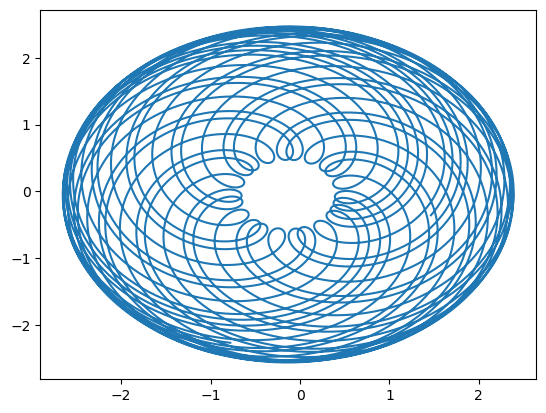

In [49]:
# YOUR CODE HERE
x,y,z = planetPlot('Mars')
plt.plot(x,y)
plt.show()
#Korrekt graf?

## Problem 6b (3 pts)

Also produce a second 3D-plot where you can interactively change the viewing angle.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Problem 7

Download climate data from https://data.giss.nasa.gov/gistemp/graphs/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv
and read in the data, which consists of measurements (both raw and smoothed) of the Mean Surface Air temperature anomaly over the Ocean and over Land areas. The description of the columns is provided in the file. Temperature anomaly means that it is the temperature difference with respect to an average. In this case the average temperature is that in the interval of 1951-1980. 

## Problem 7a (5 pts)

- Use ```np.loadtxt()``` to read the file. (Note, since this is a comma-separated .csv file, you need to use ```delimiter=','``` in ```np.loadtxt```. Also remember to skip the headers.)
- Make a scatter plot of the measurements of the anomalies. Provide a title to the figure and axis-labels as well as a legend identifying the Ocean and Land area measurements.
- Add the smoothed data as lines (with legend), and add a dashed line through $y=0$

In [ ]:
import numpy as np

# YOUR CODE HERE
raise NotImplementedError()
data

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 7b (7 pts)

- Now create a new plot where you plot, for each year (except the first), the difference to the previous year ($\Delta T_{\rm anomaly} = T_{\rm anomaly}(t)-T_{\rm anomaly}(t-1)$, this will require some array manipulation). Do this for the Ocean and Land data as well as the smoothed data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 7c (3 pts)

- Create a histogram of the difference anomaly you calculated in for the 2nd plot of this problem. Use 20 bins and range[-0.5,0.5]. Plot Earth and Ocean observations with different colors, include a legend and add a vertical line for $x=0$. 

> *Tip: use the ```alpha``` parameter of ```plt.hist``` to set the transparency of the histograms.*

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problem 7d (5 pts)

- Calculate and print the ratio of positive over negative difference anomalies ($\Delta T_{\rm anomaly}$) for both Ocean and Land. 

> *Tip: use a combination of ```np.where``` and ```np.shape```*

Call your results `land_ratio` and `ocean_ratio`, respectively.

The answers should be $1.226$ above land (`land_ratio`) and $1.000$ above the Oceans (`ocean_ratio`). 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert abs(land_ratio - 1.226) < 1.0e-3 
assert abs(ocean_ratio - 1.000) < 1.0e-3

# Problem 8 (15 pts)

You have seen how to make subplots using ```plt.subplots()```. Here you will make three subplot with function derivatives.

- Create a numpy array with at least 100 equally spaced points from $[0,2\pi]$
- Create a function $f=2\sin^2{x}-1$
- Create a figure with 3 subplots above each-other, sharing the x-axis
- Plot the function $f$ in the top panel
- Plot the derivative (simplified here by taking $f'(x') = {{f_{i+1}-f_{i}}\over{x_{i+1}-x_{i}}}$, where $x'$ is in the middle between $x_{i+1}$ and $x_i$) in the middle panel (you should write a function for the derivative). [Hint: use a function that takes as input arrays for $x$ and $f(x)$ and returns a new array for $x'=(x_{i+1}+x_{i})/2.$ **and** an array for $f'(x')$. These arrays will be one element shorter than the input array, since we cannot calculate the values for the last point of the input array]
- Plot the 2nd derivative $f''$ in the bottom panel (you can use your own defined function twice in this case).

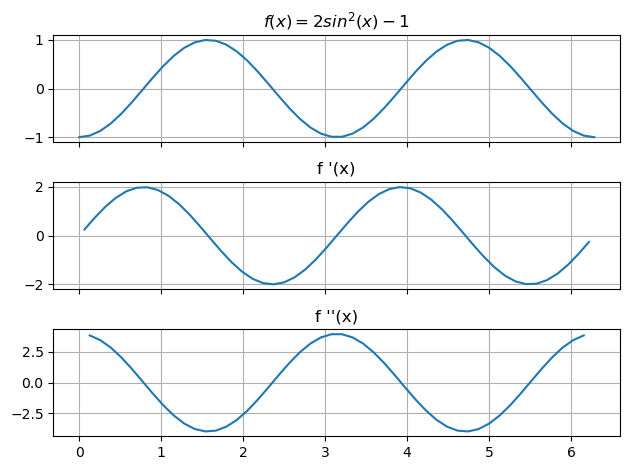

In [23]:
import numpy as np
x=np.linspace(0,2*math.pi)
def f(x):
    return 2* np.sin(x)**2-1

fig,ax = plt.subplots(3,1,sharex='col')

ax[0].plot(x,f(x))
def derive(x,y):
    xp=[] #arrays to be returned
    yp=[]
    for i in range(len(x)-1):
        xp.append((x[i+1]+x[i])/2)
        yp.append((y[i+1]-y[i])/(x[i+1]-x[i]))
    xp = np.array(xp)
    yp = np.array(yp)
    return xp,yp
xp,fp = derive(x,f(x))
xpp, fpp = derive(xp,fp)
ax[1].plot(xp,fp)
ax[2].plot(xpp,fpp)
ax[0].set_title('$f(x)=2sin^2(x)-1$')
ax[1].set_title('f \'(x)')
ax[2].set_title('f \'\'(x)')

for axes in ax.flat: 
    axes.grid() #enable grid
    
fig.tight_layout() #Spacing
plt.show()